# **Analysis of Churn Customer**

## **Introduction**

This project aim to create a machine learning model to predict wheater the client of Beta Bank will remain to stay or leave.

### **Goal**

Having a proper machine learning model to predict client churn with F1 score exceeding 0,59

### **Stages**

The stages of this project are below:

1. Load the data and study the general information.
2. Prepare the data if anomalies were found & check the class balance.
3. Create machine learning model & train the model.
4. Draw the conclusion.

### **Data Content**

The dataset consist of following columns:
    
1. Features

- RowNumber: Index of string data
- CustomerId: Customer ID
- Surname: Last name
- CreditScore: Credit score
- Geography: Country of residence
- Gender: Gender
- Age: Age
- Tenure: Duration of tenure for fixed-term customer deposits (in years)
- Balance: Account balance
- NumOfProducts: Number of bank products used by the customer
- HasCrCard: Whether the customer has a credit card (1 - yes; 0 - no)
- IsActiveMember: Customer's level of activity (1 - yes; 0 - no)
- EstimatedSalary: Estimated salary

2. Target

- Exited: Whether the customer has exited (1 - yes; 0 - no)

## **Data Loadment**

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [2]:
# Loading dataset

path = '/content/Churn.csv'
data = pd.read_csv(path)

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## **Data Preparation**

### **Learning general information**

In [4]:
# Data exploration

data.shape

(10000, 14)

In [5]:
# Retrieving information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Checking missing value

data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Comment:

1. Seems like missing value detected in column Tenure with 909 data.
2. Data type seems suitable to run machine learning

In [7]:
# Checking duplicate value

data.duplicated().sum()

0

### **Learning distribution**

#### **Exploration Exited column**

In [8]:
# Copying the data

data_eda = data.copy()

In [9]:
data_eda.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
# Checking distribution of column exited

data_eda['Exited'] = data_eda['Exited'].astype(str)

In [11]:
data_eda['Exited'] = data_eda['Exited'].replace('0', 'Stay').replace('1', 'Exit')
data_eda.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,Exit
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,Stay


In [12]:
data_eda_1 = pd.pivot_table(data_eda, index='Exited', values='RowNumber', aggfunc='count').reset_index()
data_eda_1.columns = ['Exited','Client']
data_eda_1

,Exited,Client
0,Exit,2037
1,Stay,7963


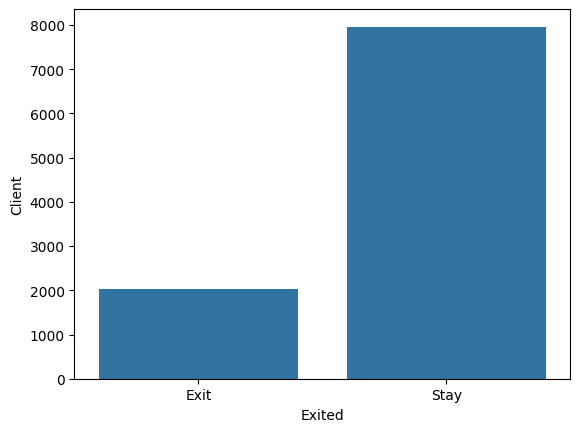

In [13]:
sns.barplot(data=data_eda_1, x='Exited', y='Client')
plt.show()

#### **General data exploration**

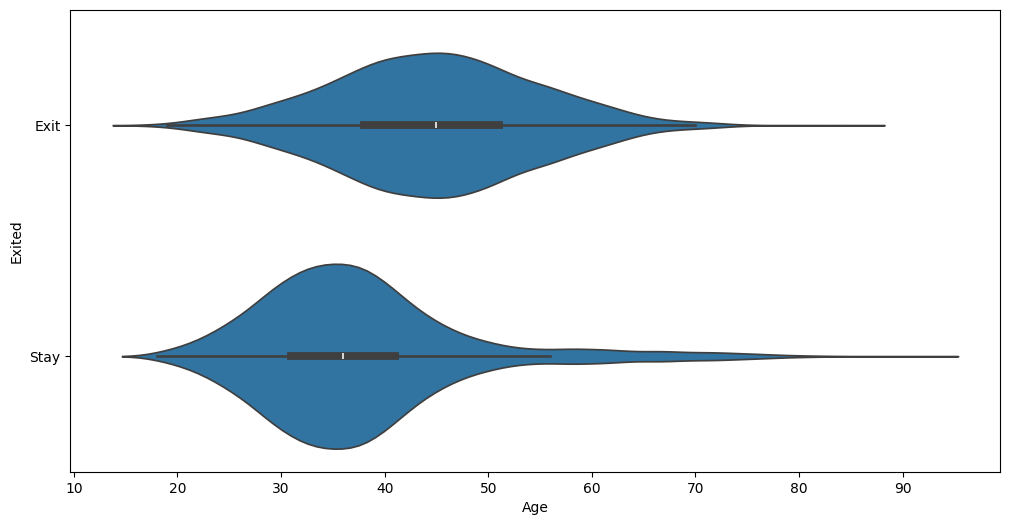

In [14]:
# Data exploration age vs exited

plt.figure(figsize=(12, 6))
sns.violinplot(data=data_eda, x='Age', y='Exited')
plt.show()

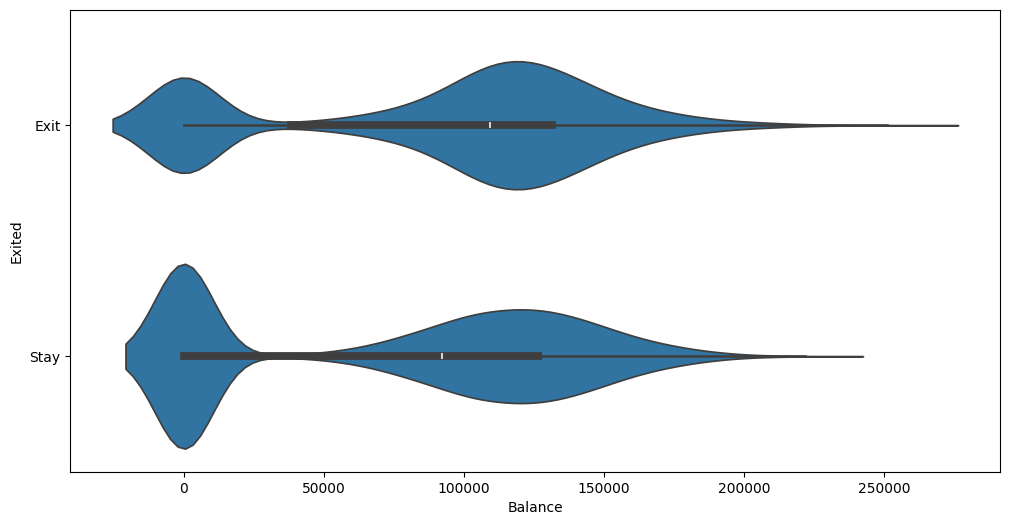

In [15]:
# Data exploration age vs exited

plt.figure(figsize=(12, 6))
sns.violinplot(data=data_eda, x='Balance', y='Exited')
plt.show()

In [16]:
data_eda['Tenure'] = data_eda['Tenure'].fillna(0)
data_eda.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

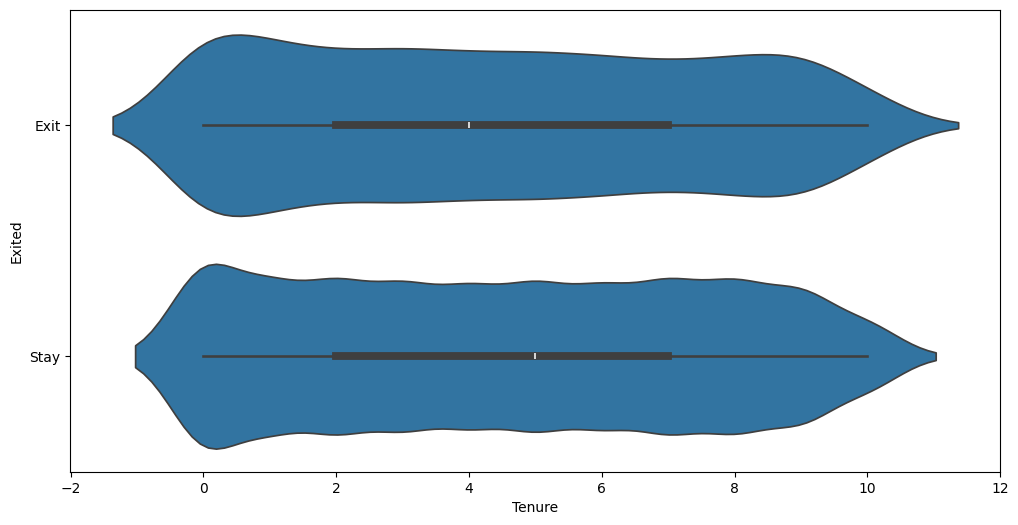

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_eda, x='Tenure', y='Exited')
plt.show()

Comment:

Based on data exploratory, we can conclude that:

1. The data is not balance, where the target column has approximately 5000 data different, between stay and leave client.
2. The missing value in column tenure can be replace by 0 since it doesnt affect significantly.

### **Data Preparation**

In [18]:
# Fill missing value in column Tenure with 0

data['Tenure'] = data['Tenure'].fillna(0)

In [19]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
# Drop unnessesary column

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [21]:
# One hot encoding the categorical nominal data

data = pd.get_dummies(data=data, drop_first=True)

In [22]:
data.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False


Since we have a lot of data, we will have the percentage as below:

- 80% data for training set.
- 10% data for test set.
- 10% data for validation set.

In [23]:
# Data splitting target and feature

target = data['Exited']
features = data.drop('Exited', axis=1)

In [24]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12)


In [25]:
features_val, features_test, target_val, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=12)


In [26]:
features_train.shape

(8000, 11)

In [27]:
features_test.shape

(1000, 11)

In [28]:
features_val.shape

(1000, 11)

## **Create Machine Learning Model**

Loop will be created in order to easier the process of running machine learning.

The `class_eval` function evaluates a classification model's performance on both training and test datasets by predicting target values and computing key metrics, including confusion matrices, accuracy, precision, recall, F1 score, and ROC AUC score. It then prints these metrics, offering a comprehensive overview of the model's accuracy in distinguishing between classes and balancing precision and recall. This helps in assessing the model's effectiveness and identifying issues such as bias or overfitting.

In [29]:
def class_eval(model, features_train, features_test, target_train, target_test):
    # Predict Train
    target_train_pred = model.predict(features_train)

    # Predict Test
    target_test_pred = model.predict(features_test)

    # Show Metrics
    # Confusion Matrix
    cm_tr = confusion_matrix(target_train, target_train_pred)
    cm_te = confusion_matrix(target_test, target_test_pred)

    # Accuracy
    accuracy_tr = (cm_tr[0][0] + cm_tr[1][1]) / (cm_tr[0][0] + cm_tr[1][1] + cm_tr[0][1] + cm_tr[1][0])
    accuracy_te = (cm_te[0][0] + cm_te[1][1]) / (cm_te[0][0] + cm_te[1][1] + cm_te[0][1] + cm_te[1][0])

    # Precision
    precision_tr_1 = cm_tr[1][1] / (cm_tr[1][1] + cm_tr[0][1])
    precision_tr_0 = cm_tr[0][0] / (cm_tr[0][0] + cm_tr[1][0])
    precision_te_1 = cm_te[1][1] / (cm_te[1][1] + cm_te[0][1])
    precision_te_0 = cm_te[0][0] / (cm_te[0][0] + cm_te[1][0])

    # Recall
    recall_tr_1 = cm_tr[1][1] / (cm_tr[1][1] + cm_tr[1][0])
    recall_tr_0 = cm_tr[0][0] / (cm_tr[0][0] + cm_tr[0][1])
    recall_te_1 = cm_te[1][1] / (cm_te[1][1] + cm_te[1][0])
    recall_te_0 = cm_te[0][0] / (cm_te[0][0] + cm_te[0][1])

    # F1 Score
    f1_score_tr_1 = (2 * precision_tr_1 * recall_tr_1) / (precision_tr_1 + recall_tr_1)
    f1_score_tr_0 = (2 * precision_tr_0 * recall_tr_0) / (precision_tr_0 + recall_tr_0)
    f1_score_te_1 = (2 * precision_te_1 * recall_te_1) / (precision_te_1 + recall_te_1)
    f1_score_te_0 = (2 * precision_te_0 * recall_te_0) / (precision_te_0 + recall_te_0)

    # ROC AUC score
    roc_auc_tr = roc_auc_score(target_train, target_train_pred)
    roc_auc_te = roc_auc_score(target_test, target_test_pred)

    # Show Output
    print('----------------Training----------------')
    print('Confusion Matrix')
    print(cm_tr)
    print('Accuracy         :', round(accuracy_tr * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_tr * 100, 1), '%')
    print('Precision Class 0:', round(precision_tr_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_tr_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_tr_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_tr_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_tr_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_tr_1 * 100, 1), '%')

    print('\n----------------Testing----------------')
    print('Confusion Matrix')
    print(cm_te)
    print('Accuracy         :', round(accuracy_te * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_te * 100, 1), '%')
    print('Precision Class 0:', round(precision_te_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_te_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_te_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_te_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_te_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_te_1 * 100, 1), '%')

### **Logistic regression**

In [30]:
# Define Model

lr = LogisticRegression()
# Training the model

lr.fit(features_train, target_train)

LogisticRegression()

In [31]:
class_eval(model=lr, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)



----------------Training----------------
Confusion Matrix
[[6259  140]
 [1517   84]]
Accuracy         : 79.3 %
ROC AUC          : 51.5 %
Precision Class 0: 80.5 %
Precision Class 1: 37.5 %
Recall Class 0   : 97.8 %
Recall Class 1   : 5.2 %
F1 Score Class 0 : 88.3 %
F1 Score Class 1 : 9.2 %

----------------Testing----------------
Confusion Matrix
[[781  13]
 [194  12]]
Accuracy         : 79.3 %
ROC AUC          : 52.1 %
Precision Class 0: 80.1 %
Precision Class 1: 48.0 %
Recall Class 0   : 98.4 %
Recall Class 1   : 5.8 %
F1 Score Class 0 : 88.3 %
F1 Score Class 1 : 10.4 %


In [32]:
# Predict Validation

target_val_pred = lr.predict(features_val)

In [33]:
# Validation Accuracy

accuracy_score(target_val, target_val_pred)

0.768

In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit = model.fit(features_val, target_val)
predicted_valid = model.predict(features_val)

print('F1 Score:', round(f1_score(target_val, predicted_valid), 2)*100, '%')

F1 Score: 5.0 %


### **Random Forest**

In [35]:
# Define Model

rf = RandomForestClassifier(max_depth=10)
# Training the model

rf.fit(features_train, target_train)

RandomForestClassifier(max_depth=10)

In [36]:
class_eval(model=rf, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)



----------------Training----------------
Confusion Matrix
[[6333   66]
 [ 730  871]]
Accuracy         : 90.0 %
ROC AUC          : 76.7 %
Precision Class 0: 89.7 %
Precision Class 1: 93.0 %
Recall Class 0   : 99.0 %
Recall Class 1   : 54.4 %
F1 Score Class 0 : 94.1 %
F1 Score Class 1 : 68.6 %

----------------Testing----------------
Confusion Matrix
[[778  16]
 [113  93]]
Accuracy         : 87.1 %
ROC AUC          : 71.6 %
Precision Class 0: 87.3 %
Precision Class 1: 85.3 %
Recall Class 0   : 98.0 %
Recall Class 1   : 45.1 %
F1 Score Class 0 : 92.3 %
F1 Score Class 1 : 59.0 %


In [37]:
# Predict Validation

target_val_pred = rf.predict(features_val)

In [38]:
# Validation Accuracy

accuracy_score(target_val, target_val_pred)

0.861

In [39]:
model = RandomForestClassifier(max_depth=11)
model.fit = model.fit(features_val, target_val)
predicted_valid = model.predict(features_val)

print('F1 Score:', round(f1_score(target_val, predicted_valid), 2)*100, '%')

F1 Score: 96.0 %


#### **Upsampling Method**

The `upsample` function balances class distribution by replicating minority class instances to address class imbalance. It separates features and targets into majority and minority classes, concatenates multiple copies of the minority class with the majority class, and shuffles the combined dataset for randomness. This process helps address class imbalance. The function is then used on features_train and target_train with a repeat factor of 10, producing upsampled datasets features_upsampled and target_upsampled.

In [41]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

In [42]:
model = RandomForestClassifier(max_depth=11)
model.fit = model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_val)

print('F1:', f1_score(target_val, predicted_valid))

F1: 0.6335616438356164


#### **Downsampling Method**

The `downsample` function balances class distribution by reducing the majority class instances to address class imbalance. It separates features and targets into majority and minority classes, samples a fraction of the majority class, concatenates these samples with the minority class, and shuffles the combined dataset for randomness. This process helps in addressing class imbalance. The function is then used on features_train and target_train with a fraction of 0.1, producing downsampled datasets features_downsampled and target_downsampled.

In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [44]:
model = RandomForestClassifier(n_estimators=500, max_depth=11)
model.fit = model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_val)

print('F1:', f1_score(target_val, predicted_valid))

F1: 0.5395232120451694


Comment:

- Upscaling Method: Using Random Forest Method with hyperparameter max_depth of 11, the F1 score is 62% exceeding the requirement.
- Downscaling Method: Using Random Forest Method with hyperparameter n_estimators of 500 and max_depth of 11, the F1 score is 53%.

## **Conclusion**

1. The goal of this project is to have machine learning model that capable of having F1 score of more than 59%.
2. The data has been through several process as below:

- Filled the missing value in column tenure with 0.
- The unnecessary columns has been dropped in order to be able to run in machine learning. Those columns are: 'RowNumber', 'CustomerId' and 'Surname'.
- One hot encoding has been applied to convert the categorical data into numerical.
- Since we have a lot of data, we will have the percentage as below:

80% data for training set.
10% data for test set.
10% data for validation set.

- Loop has been created in order to easier the task to run several number of machine learning model.
- Model that has been tried are: Logistic Regression and Random Forest with the most suitable for the project objective is Random Forest with F1 score acceding 59%.
- The hyperparameret are as below:

max_depth=10,

- hyperparameter for validation test:

max_depth=11

- The result as below:

Model: Random Forest Classifier
Training Result:

- Confusion Matrix
[[6326   73]
 [ 731  870]]
- Accuracy         : 90.0 %
- ROC AUC          : 76.6 %
- Precision Class 0: 89.6 %
- Precision Class 1: 92.3 %
- Recall Class 0   : 98.9 %
- Recall Class 1   : 54.3 %
- F1 Score Class 0 : 94.0 %
- F1 Score Class 1 : 68.4 %

Testing Result:

- Confusion Matrix
[[777  17]
 [112  94]]
- Accuracy         : 87.1 %
- ROC AUC          : 71.7 %
- Precision Class 0: 87.4 %
- Precision Class 1: 84.7 %
- Recall Class 0   : 97.9 %
- Recall Class 1   : 45.6 %
- F1 Score Class 0 : 92.3 %
- F1 Score Class 1 : 59.3 %

Validation Result

- F1 Score: 96.0 %

3. Since the target column is not balance, the imbalance should be treat by using upscaling or downscaling. The both method has been tried and the result as follow:

- Upscaling Method: Using Random Forest Method with hyperparameter max_depth of 11, the F1 score is 62% exceeding the requirement.
- Downscaling Method: Using Random Forest Method with hyperparameter n_estimators of 500 and max_depth of 11, the F1 score is 53%.

3. Summary:

- The recommended machine learning model to use during the project is Random Forest with hyperparameter max_depth=10 for testing and max_depth=11 for validation to obtain F1 score more than 59% for testing and 96% for validation.
- After the balancing has been done, the recommended machine learning model to use during the project is Random Forest with hyperparameter max_depth=10 using upscaling to tacle the imbalance can result F1 score of 62% exceeding the requirement of 59%.
